<a href="https://colab.research.google.com/github/erinijapranckeviciene/MLdata/blob/main/Classification_with_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No handles with labels found to put in legend.


Automatically created module for IPython interactive environment


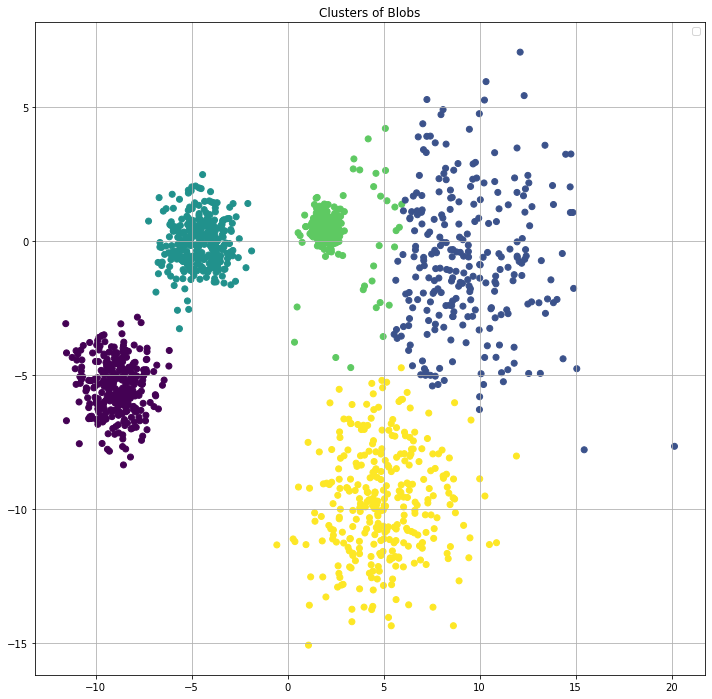

In [5]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
# nurodom sklaidą klasteriuose
c_std=[1,1,0.4,2,3]
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=5,n_features=2,cluster_std=c_std)

# Number of clusters
k=5
kmeans = KMeans(n_clusters=k, random_state=random_state)
y_pred = kmeans.fit_predict(X)

#plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Clusters of Blobs")
plt.legend()
plt.grid(True)
plt.show()


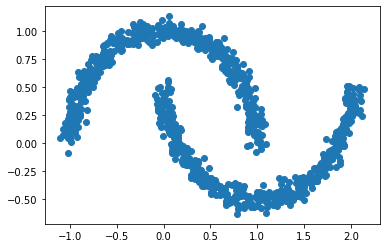

In [6]:
# Demo naudojami duomenys2 yra moons
from sklearn.datasets import make_moons
X2, y2 = make_moons(n_samples=1000, noise=0.05)
plt.scatter(X2[:, 0], X2[:, 1])

Turime pasiruošti duomenis mokymui ir testavimui

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_pred, random_state=1)
print("Training features/target:", X_train.shape, y_train.shape)
print("Testing features/target:", X_test.shape, y_test.shape)
#y_train.value_counts()
#y_test.value_counts()

Training features/target: (1125, 2) (1125,)
Testing features/target: (375, 2) (375,)


Greitas klasifikatorių palyginimas
Nuoroda į medžiagą 
https://github.com/DavidMertz/ML-Webinar

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier

classifiers = {
    "Dummy"        : DummyClassifier(strategy='uniform', random_state=2),
    "KNN(3)"       : KNeighborsClassifier(3), 
    "RBF SVM"      : SVC(gamma=2, C=1), 
   "Decision Tree": DecisionTreeClassifier(max_depth=7), 
   # "Random Forest": RandomForestClassifier(max_depth=7, n_estimators=10, max_features=4), 
   # "Neural Net"   : MLPClassifier(alpha=1), 
   # "AdaBoost"     : AdaBoostClassifier(),
    "Naive Bayes"  : GaussianNB(), 
    "QDA"          : QuadraticDiscriminantAnalysis(),
    "LDA"          : LinearDiscriminantAnalysis(),
   # "Linear SVC"   : LinearSVC(),
   # "Linear SVM"   : SVC(kernel="linear"), 
   # "Gaussian Proc": GaussianProcessClassifier(1.0 * RBF(1.0)),
}

In [20]:
from time import time
from sklearn.metrics import confusion_matrix

nfast = 10      # Don't run the very slow ones
head = list(classifiers.items())[:nfast]

for name, classifier in head:
    start = time()
    classifier.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    score = classifier.score(X_test, y_test)
    y_pred_test = classifier.predict(X_test)
    y_pred_train = classifier.predict(X_train)
    score_time = time()-start
    print("{:<15}| score = {:.3f} | time = {:,.3f}s/{:,.3f}s".format(name, score, train_time, score_time))
    print("Confusion table on training data")
    print(confusion_matrix(y_train, y_pred_train))
    print("Confusion table on test data")
    print(confusion_matrix(y_test, y_pred_test))

Dummy          | score = 0.197 | time = 0.000s/0.003s
Confusion table on training data
[[42 42 46 45 55]
 [43 46 40 53 29]
 [42 55 46 40 35]
 [45 41 53 50 46]
 [45 51 54 40 41]]
Confusion table on test data
[[12 17 12 18 11]
 [ 8  7 11  9 11]
 [17 17 19 14 15]
 [17 19 23 23 16]
 [18 11 19 18 13]]
KNN(3)         | score = 0.989 | time = 0.002s/0.059s
Confusion table on training data
[[230   0   0   0   0]
 [  0 211   0   0   0]
 [  0   0 218   0   0]
 [  0   2   0 232   1]
 [  0   2   0   0 229]]
Confusion table on test data
[[70  0  0  0  0]
 [ 0 46  0  0  0]
 [ 0  0 82  0  0]
 [ 0  3  0 94  1]
 [ 0  0  0  0 79]]
RBF SVM        | score = 0.973 | time = 0.077s/0.035s
Confusion table on training data
[[230   0   0   0   0]
 [  0 211   0   0   0]
 [  0   0 218   0   0]
 [  0   2   0 233   0]
 [  0   0   0   0 231]]
Confusion table on test data
[[69  1  0  0  0]
 [ 0 45  0  1  0]
 [ 0  2 80  0  0]
 [ 0  5  0 92  1]
 [ 0  0  0  0 79]]
Decision Tree  | score = 0.992 | time = 0.002s/0.001s
Co

Kaip suicide duomenims tinka sprendimų medžio ar artimiausio kaimyno klasifikatoriai? Pradedam su sprendimų medžiu.
Savarankiškai bandom suklasifikuoti duomenis pagal amžių , lytį, kartą ir metus. 
# Modifikuokit kodą žemiau kaip tinkama, arba dirbkite savuoju būdu

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X, y)
tree.score(X, y)

Kurie požymiai yra svarbiausi

In [ ]:
%matplotlib inline
pd.Series(tree.feature_importances_, index=X.columns).plot.barh(figsize=(18,7));

In [ ]:
# Figure out where graphviz executable lives
dotpath = !which dot

In [ ]:
# Generate cut point diagram
from sklearn.tree import export_graphviz
import sys, subprocess
from IPython.display import Image

export_graphviz(tree, feature_names=X.columns, class_names=['failure','success'],
                out_file='ml-good.dot', impurity=False, filled=True)
subprocess.check_call([dotpath[0],'-Tpng','ml-good.dot','-o','ml-good.png'])
Image('ml-good.png')

Požymių reikšmingumas

In [ ]:
tree = DecisionTreeClassifier(max_depth=7, random_state=0).fit(X, y)
pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False).head(7)